# Portfolio Allocation Optimization

The **Modern Portfolio Theory** was first introduced by the economist *Harry Markowitz* in 1952. It relies on a simple premise:
- Investors are generally risk averse, so given two portfolios with identical returns, they would choose the one with the lower volatility

At the end of the day, we want to build a chart like the one below:

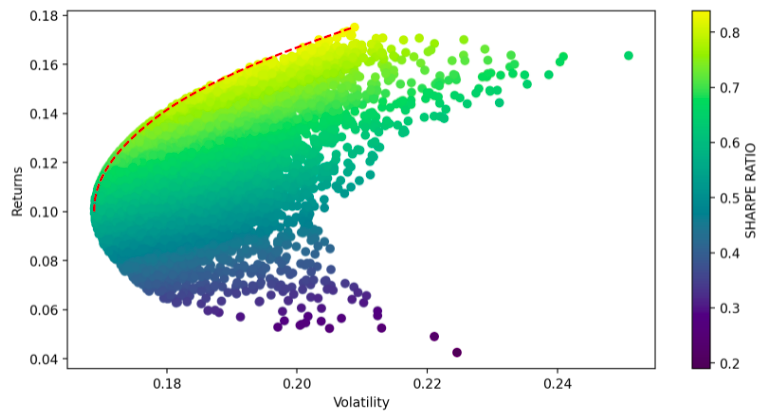

I'll explain what the Sharpe Ratio is in this notebook, but for now, you just need to figure out what this beautiful colored chart represents.<br><br>

As I told before, investors usually face a Trade-off between Returns and Volatility. The best possible scenario is one with high returns and low volatility, but it is not always possible, so they should make a choice.<br><br>

Every point in this chart represents a different portfolio allocation and our goal here is to determine the best possible allocation given the higher volatility the investor accepts.<br><br>

Let's get the hands dirty!

# 1. Importing required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from pandas_datareader import data

# 2. Selecting stocks for our portfolio

Here, I'm selecting a portfolio with:
- 3M (MMM)
- Mc Donald's (MCD)
- The Coca-Cola Company (KO)
- Starbucks Corporation (SBUX)

<br>
We are going to get our data using Pandas DataReader. The only column we are using for this analysis is the 'Adj Close'.

In [2]:
MMM = data.DataReader(name = 'MMM', data_source='yahoo', start='2015-01-01')['Adj Close']
MCD = data.DataReader(name = 'MCD', data_source='yahoo', start='2015-01-01')['Adj Close']
KO = data.DataReader(name = 'KO', data_source='yahoo', start='2015-01-01')['Adj Close']
SBUX = data.DataReader(name = 'SBUX', data_source='yahoo', start='2015-01-01')['Adj Close']

In [3]:
MCD.head()

Date
2015-01-02    77.444824
2015-01-05    76.589523
2015-01-06    76.730675
2015-01-07    78.067650
2015-01-08    78.358284
Name: Adj Close, dtype: float64

As you can see, we got the 'Adj Close' data starting from 2015.

We can plot the individual charts for better visualization:

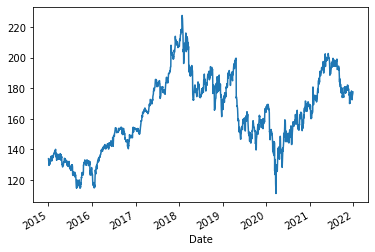

In [4]:
MMM.plot();

Now, we want all our data in a unique DataFrame. I'll call it 'retail'

In [5]:
retail = pd.concat([MMM,MCD,KO,SBUX], axis=1)
retail.columns = ['MMM','MCD','KO','SBUX']
retail.head()

,MMM,MCD,KO,SBUX
Date,,,,
2015-01-02,133.949753,77.444824,33.559853,35.957401
2015-01-05,130.928818,76.589523,33.559853,35.268616
2015-01-06,129.532669,76.730675,33.814682,34.981636
2015-01-07,130.471619,78.067650,34.236771,35.842594
2015-01-08,133.598679,78.358284,34.650894,36.420986


# 3. Calculating returns

In [6]:
retail_returns = retail.pct_change(1).dropna()
retail_returns.head()

,MMM,MCD,KO,SBUX
Date,,,,
2015-01-05,-0.022553,-0.011044,0.000000,-0.019156
2015-01-06,-0.010663,0.001843,0.007593,-0.008137
2015-01-07,0.007249,0.017424,0.012482,0.024612
2015-01-08,0.023967,0.003723,0.012096,0.016137
2015-01-09,-0.012284,-0.012187,-0.011032,-0.032731


This way we got the daily return (%) for each ticker. We can plot it and try to visualize it on the chart:

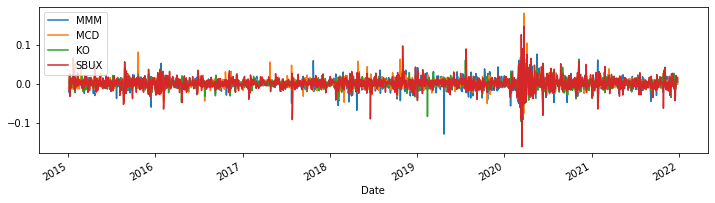

In [7]:
retail_returns.plot(figsize=(12,3));

Now, we want the cumulative return, to check the total return in the analyzed period. Let's check the cumulative returns for MMM and MCD to see how we can use it.

In [8]:
cumul_return_MMM = (1 + retail_returns['MMM']).cumprod() - 1
cumul_return_MMM

Date
2015-01-05   -0.022553
2015-01-06   -0.032976
2015-01-07   -0.025966
2015-01-08   -0.002621
2015-01-09   -0.014873
                ...   
2021-12-21    0.290932
2021-12-22    0.288841
2021-12-23    0.306236
2021-12-27    0.319151
2021-12-28    0.326169
Name: MMM, Length: 1759, dtype: float64

In [9]:
cumul_return_MCD = (1 + retail_returns['MCD']).cumprod() - 1
cumul_return_MCD

Date
2015-01-05   -0.011044
2015-01-06   -0.009221
2015-01-07    0.008042
2015-01-08    0.011795
2015-01-09   -0.000536
                ...   
2021-12-21    2.413915
2021-12-22    2.421016
2021-12-23    2.434058
2021-12-27    2.463627
2021-12-28    2.458979
Name: MCD, Length: 1759, dtype: float64

From 2015-01-01 to 2021-12-28, we would've ended up with a profit of:
- 32.62% of the money invested in MMM and
- 245.90% of the money invested in MCD

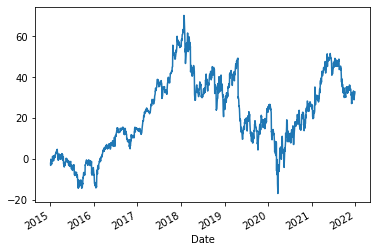

In [10]:
cumul_percent_return_MMM = 100 * cumul_return_MMM
cumul_percent_return_MMM.plot();

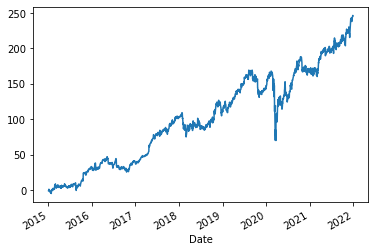

In [11]:
cumul_percent_return_MCD = 100 * cumul_return_MCD
cumul_percent_return_MCD.plot();

# 4. The dot product

We are going to make use of the np.dot function. I'll briefly explain it:<br><br>
If we ask for the np.dot of [2,3] and [10,20], we are going to receive:
- the product of the first number of the first array (2) and the the first number of the second array (10) 
- PLUS
- the product of the second number of the first array (3) and the the second number of the second array (20) <br><br>

So:<br><br>
[2,3] dot [10.20] = (2 x 10) + (3 x 20)<br>
[2,3] dot [10.20] = 20 + 60<br>
[2,3] dot [10.20] = 80

In [12]:
np.dot([2,3],[10,20])

80

This is going to be very useful because we can get random weights for the portfolio and generate thousands of possibilities. We just need to get the dot product between the random weights and the returns using np.dot<br><br>

I'll try to make it clear.<br><br>

Note: I'm transposing our dataframe so we have it in the shape we need to get the dot products

In [13]:
retail_returns.transpose()

Date,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,...,2021-12-14,2021-12-15,2021-12-16,2021-12-17,2021-12-20,2021-12-21,2021-12-22,2021-12-23,2021-12-27,2021-12-28
MMM,-0.022553,-0.010663,0.007249,0.023967,-0.012284,-0.005445,-0.000747,-0.004856,-0.001126,0.014656,...,0.000802,0.006067,0.014393,-0.019965,-0.012074,0.001622,-0.001619,0.013496,0.009887,0.005320
MCD,-0.011044,0.001843,0.017424,0.003723,-0.012187,-0.002146,-0.001935,-0.013897,-0.001748,0.001203,...,-0.002167,0.007618,0.003894,-0.014498,0.000115,0.010163,0.002080,0.003812,0.008611,-0.001342
KO,0.000000,0.007593,0.012482,0.012096,-0.011032,-0.009064,-0.000235,-0.001642,-0.004229,0.003539,...,0.000693,0.004498,0.010162,-0.015686,-0.003291,0.003997,0.007097,0.000688,0.007386,0.003922
SBUX,-0.019156,-0.008137,0.024612,0.016137,-0.032731,0.005514,0.007977,-0.005565,-0.010445,0.012943,...,-0.007355,-0.000262,-0.009505,-0.043666,-0.004971,0.021094,0.012413,0.005638,0.016463,0.011819


When our weights are:
- [1,0,0,0], it means that we'll have 100% of our money allocated in MMM;
- [0.25,0.25,0.25,0.25], it means that we'll have 25% of our money allocated in each stock.

First, let's try with 100% invested in MMM and check the result with the daily return we got before:

In [14]:
# 100% invested in MMM
np.dot([1,0,0,0], retail_returns.transpose())

array([-0.02255275, -0.01066342,  0.00724875, ...,  0.0134963 ,
        0.00988738,  0.00531976])

As expected, if we allocate 100% in MMM, we'll have the same daily returns of MMM.

# 5. Equal weighting

Let's generate the returns for a equally weighted portfolio (25% for each stock)

In [15]:
N = len(retail_returns.columns)
equal_weights = N * [1/N]
equal_weights

[0.25, 0.25, 0.25, 0.25]

In [16]:
equal_returns = np.dot(equal_weights, retail_returns.transpose())
equal_returns

array([-0.01318809, -0.00234104,  0.01544178, ...,  0.00590855,
        0.0105868 ,  0.00492965])

Now, we got mixed daily returns.

In [17]:
cum_equal_weighted_returns = (1 + equal_returns).cumprod() - 1
cum_equal_weighted_returns_perc = 100 * cum_equal_weighted_returns
cum_equal_weighted_returns_perc

array([-1.31880876e+00, -1.54982505e+00, -2.95788859e-02, ...,
        1.37198009e+02,  1.39709175e+02,  1.40890857e+02])

With equal weighting, we would've ended up with 140% of cumulative return. Let's plot it.

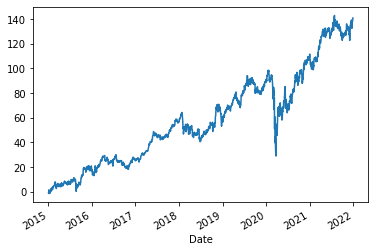

In [18]:
cewrp = pd.Series(cum_equal_weighted_returns_perc, index=retail_returns.index)
cewrp.plot();

Now, let's compare this allocation (equal weightin) with the 100% MMM and the 100% MCD that we checked before.

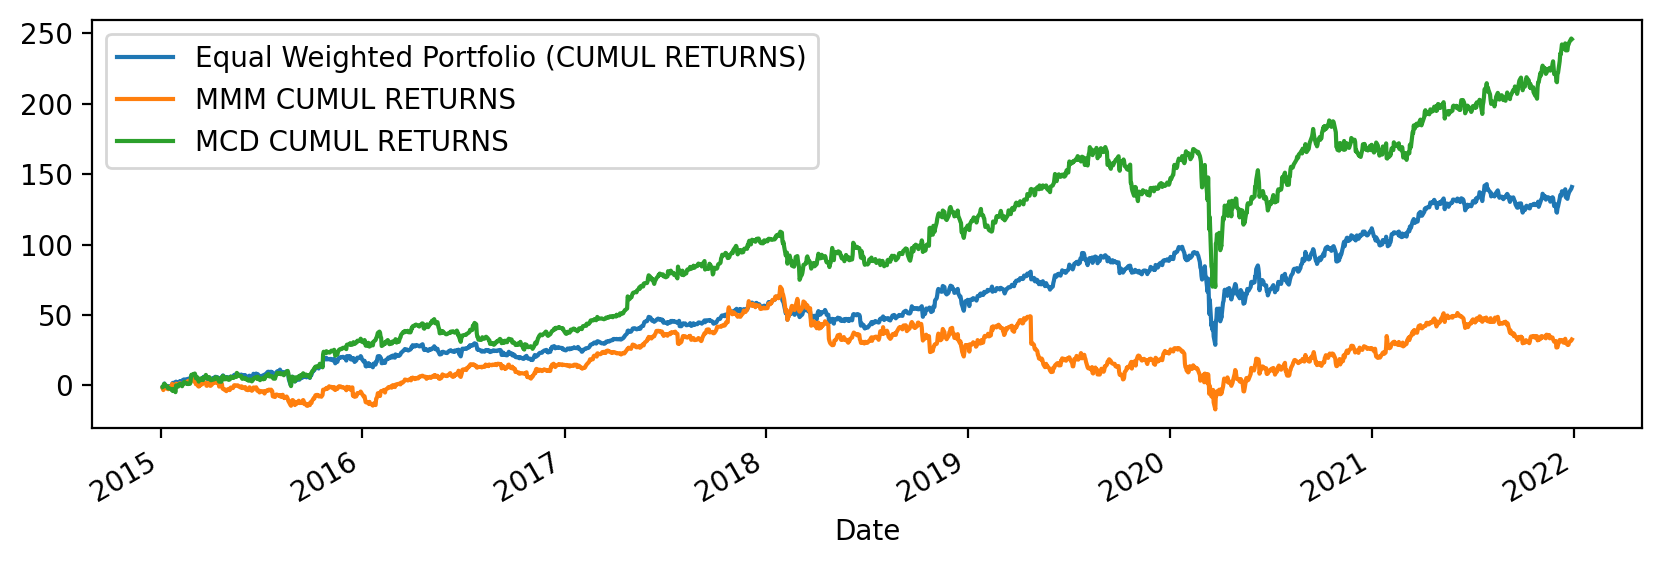

In [19]:
plt.figure(figsize=(10,3), dpi=200)
cewrp.plot(label='Equal Weighted Portfolio (CUMUL RETURNS)')
cumul_percent_return_MMM.plot(label='MMM CUMUL RETURNS')
cumul_percent_return_MCD.plot(label='MCD CUMUL RETURNS')
plt.legend();

# 6. Monte Carlo Simulation

Now that we know how to get different weights and returns for our portfolio, let's simulate lots of scenarios and try to get the best one.<br><br>

For this, I'll out the returns in a logarithmic scale. The Log scale is a better fit if we want to compare different returns.

In [20]:
log_rets = np.log(retail / retail.shift(1)).dropna()

Alright. Now we need to declare some random weights to build ou Monte Carlo Simulation. Let's build a function.

In [21]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights / np.sum(weights)

In [22]:
# Testing it
weights = gen_weights(4)
weights

array([0.38185406, 0.01892092, 0.43166979, 0.16755523])

Now, a function for calculating the returns.<br><br>

Note: We are multiplying it for 252 because this is the number of days the stock market is open every year.

In [23]:
def calculate_returns(weights, log_rets):
    return np.sum(log_rets.mean()*weights) * 252

#### Volatility

Now we need to create a function to get the volatility of our portfolio.

In [24]:
log_rets_cov = log_rets.cov()
log_rets_cov

,MMM,MCD,KO,SBUX
MMM,0.000210,0.000090,0.000089,0.000107
MCD,0.000090,0.000185,0.000083,0.000140
KO,0.000089,0.000083,0.000139,0.000095
SBUX,0.000107,0.000140,0.000095,0.000268


In [25]:
def calculate_volatility(weights):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(), annualized_cov)
    return np.sqrt(vol)

In [26]:
# Testing it
calculate_volatility(weights)

0.17702385958677566

This is our volatility with the random generated weights.

#### Simulation

Now, we need to create many many many random weights and simulate the returns and volatilities.

In [27]:
# mc stands for 'Monte Carlo'
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
n_simulations = 12000

for sim in range(n_simulations):
    weights = gen_weights(N=4)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights,log_rets))
    mc_portfolio_vol.append(calculate_volatility(weights))
    clear_output(wait=True)
    print("Total simulations: {}/{}".format(sim+1,n_simulations))

Total simulations: 12000/12000


# 7. Sharpe Ratio

The Sharpe Ratio is the combination of return and risk (volatility). This is how it is calculated:<br><br>
SR = (Asset return - Risk free return) / Standard deviation of Asset return<br><br>
The Risk free return can be considered the treasure of US, which we can consider close to zero. The risk free return calculation includes other variables like the inflation rate, but let's just consider it close to zero, as it really is.<br><br>

So, the Sharpe Ratio can be considered to be equal to the return divided by the STD of the return. The bigger SR, the better.<br><br>

- The mean asset return is going to be the daily percent return average.
- The STD of asset return is going to be the STD of daily percent returns, as known as the volatility.
<br><br>

In general, a Sharpe Ratio of:
- 0-1 is suboptimal
- 1-2 is generally good
- 2-3 is very good
- 3-4 os excellent


In [28]:
mc_sharpe_ratios = np.array(mc_portfolio_returns) / np.array(mc_portfolio_vol)

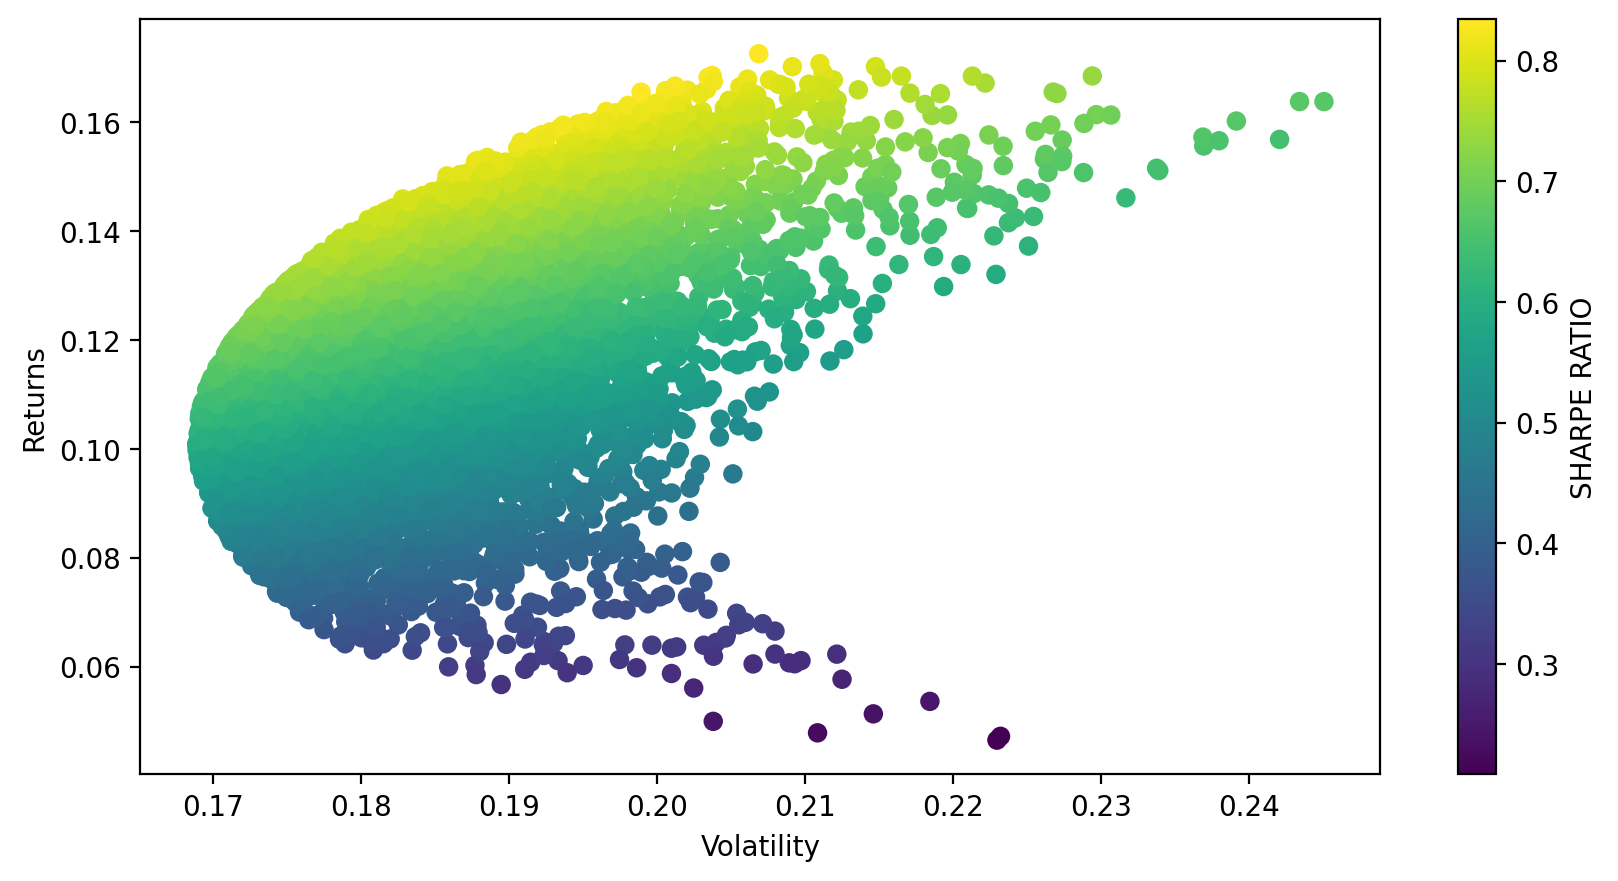

In [29]:
plt.figure(dpi=200, figsize=(10,5));
plt.scatter(mc_portfolio_vol, mc_portfolio_returns, c=mc_sharpe_ratios);
plt.colorbar(label='SHARPE RATIO');
plt.xlabel('Volatility');
plt.ylabel('Returns');

Beautiful! Now, let's get the index of the maximum value of all sharpe ratios

In [30]:
max_sharpe_ratio_index = np.argmax(mc_sharpe_ratios)
max_sharpe_ratio_index

6143

#### Best weights

In [31]:
max_sr_weights = mc_weights[max_sharpe_ratio_index]
stocks = retail.columns
print("Max Sharpe Ratio weights:")
for i,x in enumerate(stocks):
    print("{}: {}%".format(x,round(max_sr_weights[i]*100,2)))

Max Sharpe Ratio weights:
MMM: 1.18%
MCD: 82.87%
KO: 2.16%
SBUX: 13.79%


# 8. Minimization and Efficient Frontier

Now, this is the hardest part of this project and trying to explain the minimize scipy function is not the purpose of this job, so if you are interested in knowing how the minimize works, I really encourage you to read the scipy documentation.

#### Minimization

In [32]:
from scipy.optimize import minimize

In [33]:
def function_to_minimize(weights):
    return -1 * (calculate_returns(weights, log_rets)/calculate_volatility(weights, log_rets_cov))

In [34]:
bounds = tuple((0,1) for n in range(N)) # weights must be between 0 and 1


#### Efficient Frontier

In [35]:
expected_returns_range = np.linspace(0.10,0.175,100) # .1 and .18 are the possible range of returns

In [36]:
constraints = ({'type':'eq', 'fun':lambda weights: np.sum(weights)-1},
              {'type': 'eq', 'fun':lambda weights: calculate_returns(weights, log_rets)-possible_return})

In [37]:
frontier_vol = []
portfolio_holdings = []

for possible_return in expected_returns_range:
    result = minimize(calculate_volatility, equal_weights, bounds=bounds, constraints=constraints)
    frontier_vol.append(result['fun'])
    portfolio_holdings.append(result['x'])

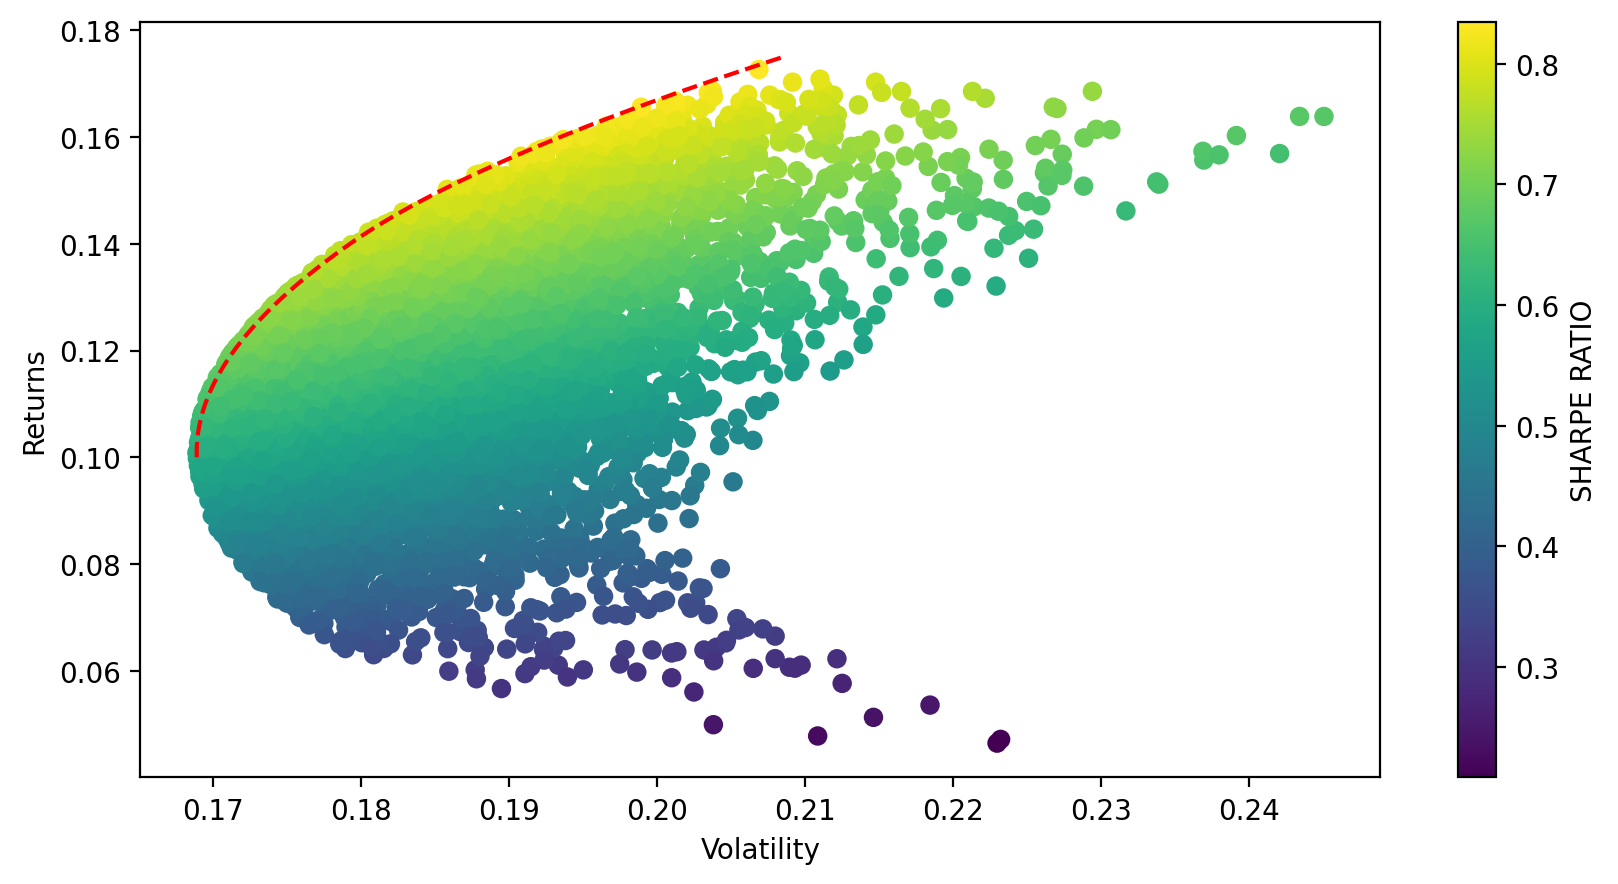

In [38]:
plt.figure(dpi=200, figsize=(10,5))
plt.scatter(mc_portfolio_vol, mc_portfolio_returns, c=mc_sharpe_ratios)
plt.colorbar(label='SHARPE RATIO')
plt.xlabel('Volatility')
plt.ylabel('Returns')

plt.plot(frontier_vol, expected_returns_range, color='red', ls='--');

Let's search for the best return when the volatility is 0.20

In [39]:
frontier_vol = np.array(frontier_vol)

In [40]:
def get_best_with_volatility(vol):
    ind = np.where(frontier_vol>=vol)[0][0]
    print("--- Volatility {} ---".format(vol,expected_returns_range[ind]))
    print("\nBest Weights:")
    for i,x in enumerate(stocks):
        print("{}: {}%".format(x,round(portfolio_holdings[ind][i]*100,3)))
    print("\nBest Return: {}".format(round(expected_returns_range[ind],3)))

In [41]:
get_best_with_volatility(0.2)

--- Volatility 0.2 ---

Best Weights:
MMM: 0.0%
MCD: 73.14%
KO: 8.689%
SBUX: 18.171%

Best Return: 0.167
